In [6]:
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Load the Harvey Norman data
df_harvey = pd.read_csv('C:/Users/User/5m-data-2.4-data-extraction-scraping/notebooks/harvey_norman_data/HN_upd_categories_20250317-111356.csv')

# Load the Courts data 
df_courts = pd.read_csv('C:/Users/User/5m-data-2.4-data-extraction-scraping/notebooks/Courts_data/CS_upd_categories_20250317-111356.csv')

In [8]:
# Analysis 1: Top 10 products with highest discount amounts
print("\nTop 10 Products with Highest Discount Amounts:")
HN_top_discount_products = df_harvey.sort_values('discount_amount', ascending=False).head(10)
print(HN_top_discount_products[['product_name', 'original_price', 'current_price', 'discount_amount', 'discount_percentage', 'category']])

CS_top_discount_products = df_courts.sort_values('discount_amount', ascending=False).head(10)
print(CS_top_discount_products[['product_name', 'original_price', 'current_price', 'discount_amount', 'discount_percentage', 'category']])


Top 10 Products with Highest Discount Amounts:
                                           product_name  original_price  \
549                   Hisense 4K ULED Smart TV HS100U7K         16999.0   
1041  LG OLED97M4PSA 97" Signature Wireless OLED M4 ...         39999.0   
1157  Samsung UA98DU9000KXXS 98" Crystal UHD DU9000 ...         10999.0   
559             Hisense 100-inch 4K Laser TV - HS100L9H         11999.0   
552                      Hisense 4K Mini ULED TV HS85UX         13999.0   
1139  Sony Bravia 9 85" Mini LED QLED 4K HDR Google ...         12999.0   
550                      Hisense 4K Mini ULED TV HS65UX          6999.0   
547                 Hisense 4K Laser 120" TV - HS120L9H         12999.0   
1714                  ALF Accademia King Long Bed Frame          6499.0   
551                      Hisense 4K Mini ULED TV HS75UX          7999.0   

      current_price  discount_amount  discount_percentage   category  
549          8799.0           8200.0                48.

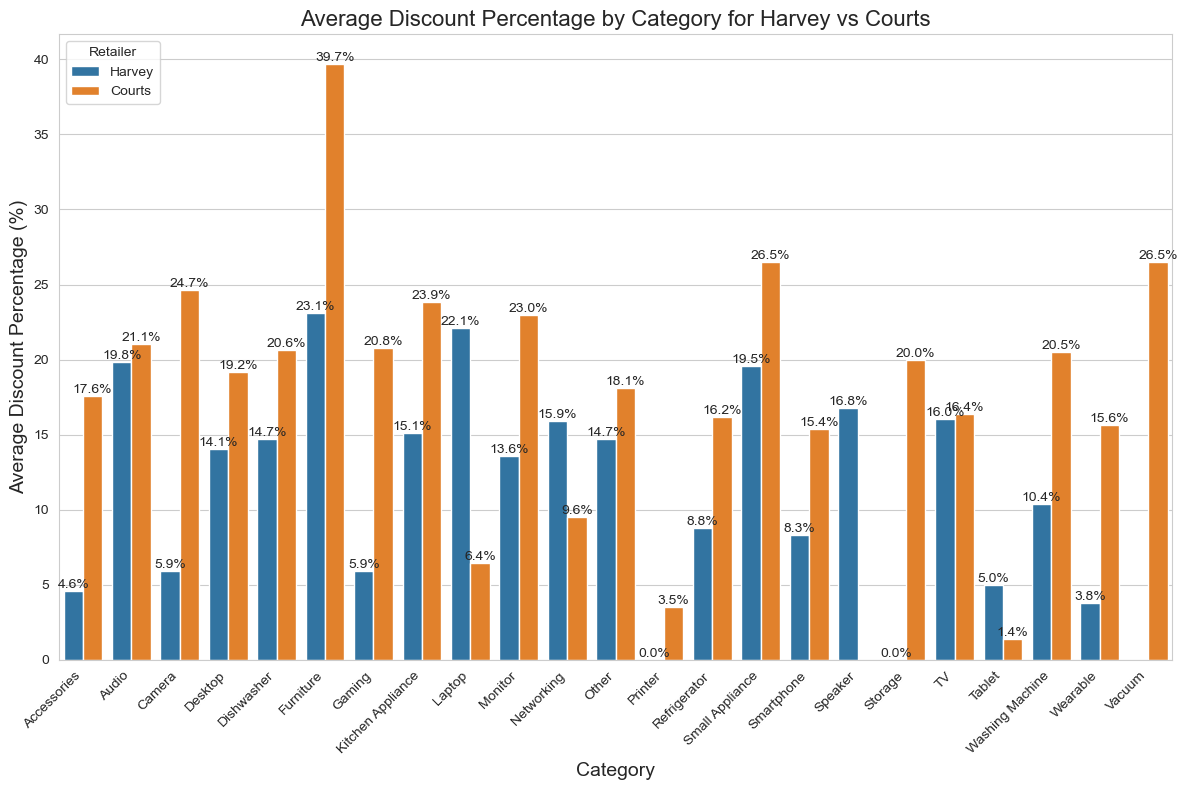

Average Discount Percentage by Category:
             category  Courts  Harvey
0         Accessories   17.61    4.57
1               Audio   21.05   19.83
2              Camera   24.65    5.90
3             Desktop   19.16   14.06
4          Dishwasher   20.63   14.74
5           Furniture   39.67   23.11
6              Gaming   20.76    5.90
7   Kitchen Appliance   23.87   15.13
8              Laptop    6.44   22.11
9             Monitor   22.96   13.61
10         Networking    9.55   15.94
11              Other   18.09   14.74
12            Printer    3.50    0.00
13       Refrigerator   16.17    8.81
14    Small Appliance   26.51   19.55
15         Smartphone   15.41    8.32
16            Speaker     NaN   16.80
17            Storage   19.96    0.00
18                 TV   16.39   16.05
19             Tablet    1.37    4.98
20             Vacuum   26.52     NaN
21    Washing Machine   20.48   10.41
22           Wearable   15.62    3.79


In [9]:
# Analysis 2: Calculate average discount percentage by category for each retailer

harvey_avg_discount = df_harvey.groupby('category')['discount_percentage'].mean().reset_index()
harvey_avg_discount['retailer'] = 'Harvey'

courts_avg_discount = df_courts.groupby('category')['discount_percentage'].mean().reset_index()
courts_avg_discount['retailer'] = 'Courts'

# Step 2: Combine the results
combined_avg_discount = pd.concat([harvey_avg_discount, courts_avg_discount])

# Step 3: Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the grouped bar chart
chart = sns.barplot(
    data=combined_avg_discount,
    x='category',
    y='discount_percentage',
    hue='retailer',
    palette=['#1f77b4', '#ff7f0e']  # Blue for Harvey, Orange for Courts
)

# Customize the chart
plt.title('Average Discount Percentage by Category for Harvey vs Courts', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Discount Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Retailer')

# Add value labels on top of bars
for container in chart.containers:
    chart.bar_label(container, fmt='%.1f%%')

# Adjust layout
plt.tight_layout()

# Show the chart
plt.show()

# Optional: Create a table with the numerical results
print("Average Discount Percentage by Category:")
pivot_table = combined_avg_discount.pivot(index='category', columns='retailer', values='discount_percentage')
pivot_table = pivot_table.reset_index()
pivot_table.columns.name = None
print(pivot_table.round(2))

# Save the figure if needed
# plt.savefig('retailer_discount_comparison.png', dpi=300, bbox_inches='tight')

=== HARVEY NORMAN - TOP DISCOUNTED PRODUCT BY CATEGORY ===
             category                                       product_name  \
9               Other  Shark HD440SLSM Flexstyle Air Styling & Drying...   
3   Kitchen Appliance  Tefal 1.8L Rice Master Max Induction Rice Cook...   
6               Audio                     Sennheiser Ambeo Mini Soundbar   
4              Camera            GoPro Acc Ultra Wide Lens Mod Aewal-001   
7     Small Appliance             Midea MVC-V18P Cordless Vacuum Cleaner   
8                  TV  Hisense Q6N 55-inch QLED Max 4K Google TV - Bl...   
2          Dishwasher  TOSHIBA DW-13F1(G)-SG Freestanding Dishwasher ...   
17          Furniture  Lifestyle Garden Bendigo Outdoor 73cm Side Tab...   
10         Smartphone  JBL Tune 670NC Noise Cancelling Wireless Headp...   
11             Laptop   Tomtoc Slash A63 12L Laptop Backpack - Moon Gray   
5         Accessories  Mazer Fly-Mate Duo in-flight Wireless Adapter ...   
19             Tablet  Creati

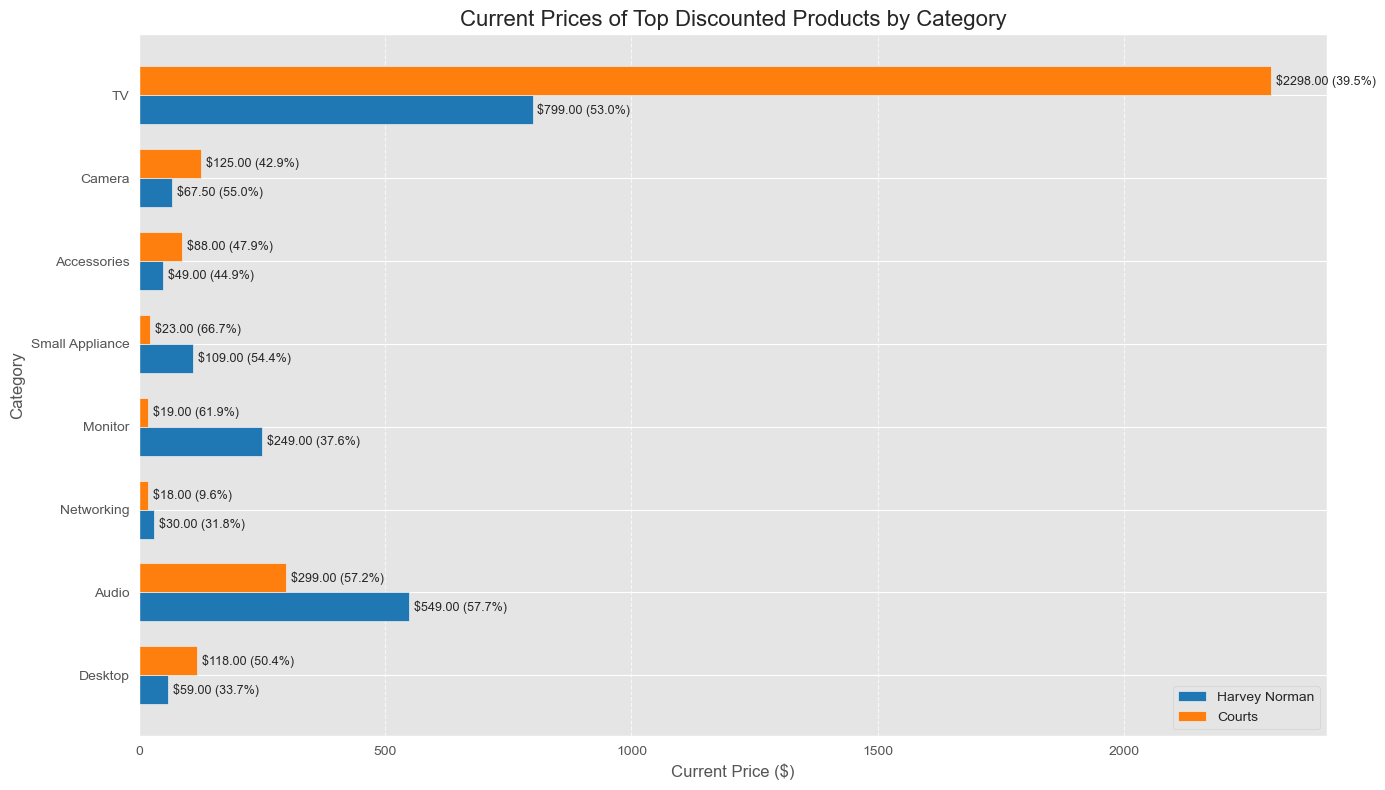

In [12]:
##sample 2 
# Function to get top discounted product in each category
def get_top_discounted_by_category(df, retailer_name):
    results = []
    
    # Group by category and find the product with highest discount in each category
    for category in df['category'].unique():
        category_df = df[df['category'] == category]
        if not category_df.empty:
            # Get the product with the highest discount
            top_product = category_df.loc[category_df['discount_percentage'].idxmax()]
            
            results.append({
                'category': category,
                'product_name': top_product['product_name'],
                'current_price': top_product['current_price'],
                'original_price': top_product['original_price'],
                'discount_percentage': top_product['discount_percentage'],
                'retailer': retailer_name
            })
    
    return pd.DataFrame(results)

# Get top discounted products for each retailer
HN_top_by_category = get_top_discounted_by_category(df_harvey, 'Harvey Norman')
CS_top_by_category = get_top_discounted_by_category(df_courts, 'Courts')

# Sort by discount percentage (descending)
HN_top_by_category = HN_top_by_category.sort_values('discount_percentage', ascending=False)
CS_top_by_category = CS_top_by_category.sort_values('discount_percentage', ascending=False)

# Print the results
print("=== HARVEY NORMAN - TOP DISCOUNTED PRODUCT BY CATEGORY ===")
print(HN_top_by_category[['category', 'product_name', 'current_price', 'original_price', 'discount_percentage']])

print("\n=== COURTS - TOP DISCOUNTED PRODUCT BY CATEGORY ===")
print(CS_top_by_category[['category', 'product_name', 'current_price', 'original_price', 'discount_percentage']])

# Find common categories between both retailers for comparison
common_categories = set(HN_top_by_category['category']).intersection(set(CS_top_by_category['category']))

# If you want to include all categories instead of just common ones, use:
# all_categories = set(HN_top_by_category['category']).union(set(CS_top_by_category['category']))
# common_categories = all_categories

# Select the top N categories for visualization (to avoid overcrowding)
top_n = min(8, len(common_categories))  # Display up to 8 categories
selected_categories = list(common_categories)[:top_n]

# Create dataframes with only the selected categories
HN_selected = HN_top_by_category[HN_top_by_category['category'].isin(selected_categories)]
CS_selected = CS_top_by_category[CS_top_by_category['category'].isin(selected_categories)]

# Plot setup
plt.figure(figsize=(14, 8))
plt.style.use('ggplot')

# Set up bar positions
bar_width = 0.35
index = np.arange(len(selected_categories))

# Plot bars
plt.barh(index - bar_width/2, 
         HN_selected.set_index('category').loc[selected_categories]['current_price'], 
         bar_width, 
         label='Harvey Norman', 
         color='#1f77b4')

plt.barh(index + bar_width/2, 
         CS_selected.set_index('category').loc[selected_categories]['current_price'], 
         bar_width, 
         label='Courts', 
         color='#ff7f0e')

# Add labels and formatting
plt.xlabel('Current Price ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Current Prices of Top Discounted Products by Category', fontsize=16)
plt.yticks(index, selected_categories, fontsize=10)
plt.legend(loc='best')

# Add price and discount labels
for i, category in enumerate(selected_categories):
    # Harvey Norman label
    if category in HN_selected['category'].values:
        hn_price = HN_selected[HN_selected['category'] == category]['current_price'].values[0]
        hn_discount = HN_selected[HN_selected['category'] == category]['discount_percentage'].values[0]
        plt.text(hn_price + 10, i - bar_width/2, 
                 f"${hn_price:.2f} ({hn_discount:.1f}%)", 
                 va='center', ha='left', fontsize=9)
    
    # Courts label
    if category in CS_selected['category'].values:
        cs_price = CS_selected[CS_selected['category'] == category]['current_price'].values[0]
        cs_discount = CS_selected[CS_selected['category'] == category]['discount_percentage'].values[0]
        plt.text(cs_price + 10, i + bar_width/2, 
                 f"${cs_price:.2f} ({cs_discount:.1f}%)", 
                 va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()